In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("banking.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Faire un traitement d’apurement (features Ingeering) préliminaire pour rendre la base de données utilisable  

In [4]:
# Inspection des informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes :")
print(missing_values)

Valeurs manquantes :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [6]:
# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 12


In [7]:
# Aperçu des statistiques descriptives
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
# Suppression des doublons
df = df.drop_duplicates()

In [9]:
# Vérification du résultat
print(f"Nombre de doublons après suppression : {df.duplicated().sum()}")

Nombre de doublons après suppression : 0


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encodage des colonnes catégoriques
categorical_features = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Exclure la variable cible de la normalisation
numerical_features = df.drop(columns=['y']).select_dtypes(include=['int64', 'float64']).columns


In [15]:
# Application de la normalisation
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [16]:
# Vérification des colonnes normalisées
df[numerical_features].head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.381573,-0.186330,-0.565963,0.195443,-0.349551,0.839079,-0.227562,0.951394,0.773578,0.845186
1,1.245251,-0.463998,-0.565963,0.195443,-0.349551,-0.115810,-0.649100,-0.323509,0.230456,0.398131
2,-1.153854,0.311159,0.155984,-5.116568,3.691192,-1.134358,0.828013,0.151878,-1.667589,-2.428148
3,-0.098248,-0.282743,-0.204990,0.195443,-0.349551,-1.198017,-0.865052,-1.425544,-1.277833,-0.940269
4,1.437179,-0.467855,-0.565963,-5.132617,1.670821,-1.898269,-2.374990,1.966994,-1.586870,-1.257222


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# Séparer les features et la cible
X = df.drop(columns=['y'])
y = df['y']

In [19]:
# Application de SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# Vérification de la nouvelle distribution
print("Distribution de la variable cible après SMOTE :")
print(y_resampled.value_counts())

Distribution de la variable cible après SMOTE :
y
0    36537
1    36537
Name: count, dtype: int64


In [21]:
# Sauvegarde dans un nouveau fichier CSV
df.to_csv('banking_cleaned.csv', index=False)
print("Les données nettoyées ont été sauvegardées dans 'banking_cleaned.csv'.")


Les données nettoyées ont été sauvegardées dans 'banking_cleaned.csv'.


# Faites ensuite une analyse descriptive de certaines variables clés que vous allez choisir

In [22]:
# Aperçu des variables disponibles
print("Liste des colonnes disponibles :")
print(df.columns)

Liste des colonnes disponibles :
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [23]:
# Choisir les variables clés pour l'analyse
key_variables = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'duration', 'y']

In [24]:
# Analyse des statistiques descriptives pour les variables numériques
numerical_stats = df.describe()

In [25]:
# Analyse des fréquences pour les variables catégoriques
categorical_stats = {}
for col in df.select_dtypes(include=['object']).columns:
    categorical_stats[col] = df[col].value_counts()

In [26]:
# Résultat
print("Statistiques numériques :")
print(numerical_stats)
print("\nFréquences des variables catégoriques :")
for col, stats in categorical_stats.items():
    print(f"\n{col} :\n{stats}")

Statistiques numériques :
                age           job       marital     education       default  \
count  4.117600e+04  41176.000000  41176.000000  41176.000000  41176.000000   
mean   9.240714e-17      3.724184      1.172746      3.746916      0.208908   
std    1.000012e+00      3.594459      0.608905      2.136539      0.406713   
min   -2.209460e+00      0.000000      0.000000      0.000000      0.000000   
25%   -7.699975e-01      0.000000      1.000000      2.000000      0.000000   
50%   -1.942124e-01      2.000000      1.000000      3.000000      0.000000   
75%    6.694654e-01      7.000000      2.000000      6.000000      0.000000   
max    5.563639e+00     11.000000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean       1.071789      0.327521      0.365286      4.231033      2.004614   
std        0.985305      

C:\Users\kotic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


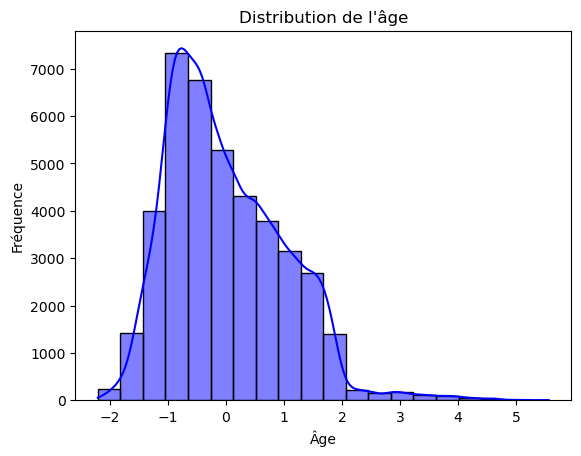

In [27]:
# Distribution de l'âge
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

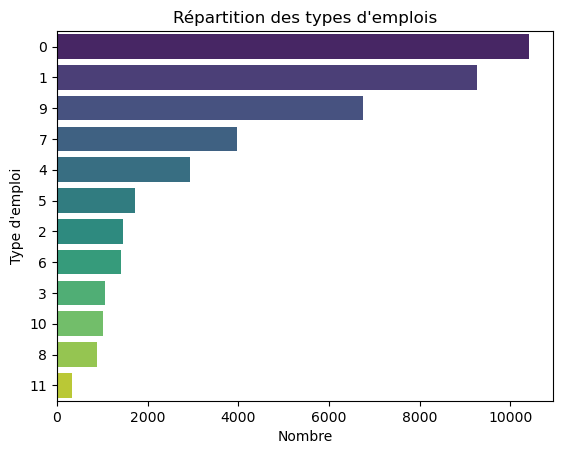

In [28]:
# Répartition des emplois
sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette='viridis')
plt.title("Répartition des types d'emplois")
plt.xlabel("Nombre")
plt.ylabel("Type d'emploi")
plt.show()


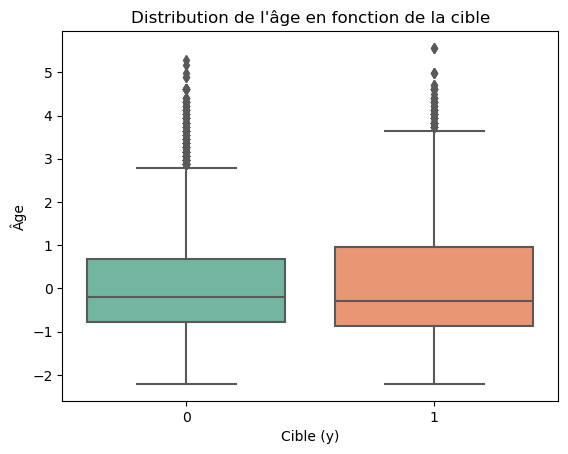

In [29]:
# Boxplot pour l'âge en fonction de la cible
sns.boxplot(x='y', y='age', data=df, palette='Set2')
plt.title("Distribution de l'âge en fonction de la cible")
plt.xlabel("Cible (y)")
plt.ylabel("Âge")
plt.show()

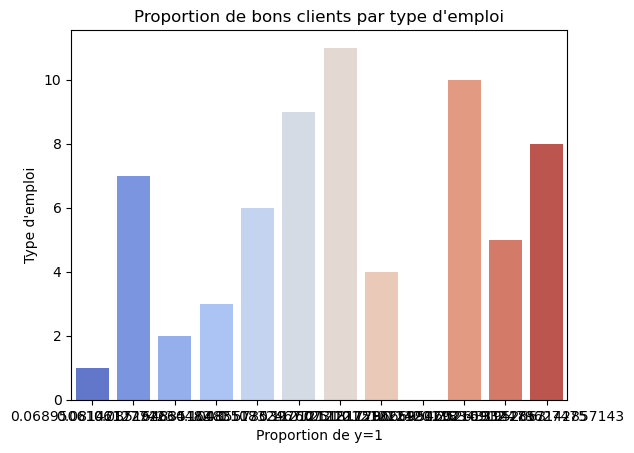

In [30]:
# Proportion de "bons clients" par type d'emploi
job_vs_y = df.groupby('job')['y'].mean()
sns.barplot(x=job_vs_y, y=job_vs_y.index, palette='coolwarm')
plt.title("Proportion de bons clients par type d'emploi")
plt.xlabel("Proportion de y=1")
plt.ylabel("Type d'emploi")
plt.show()


In [31]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

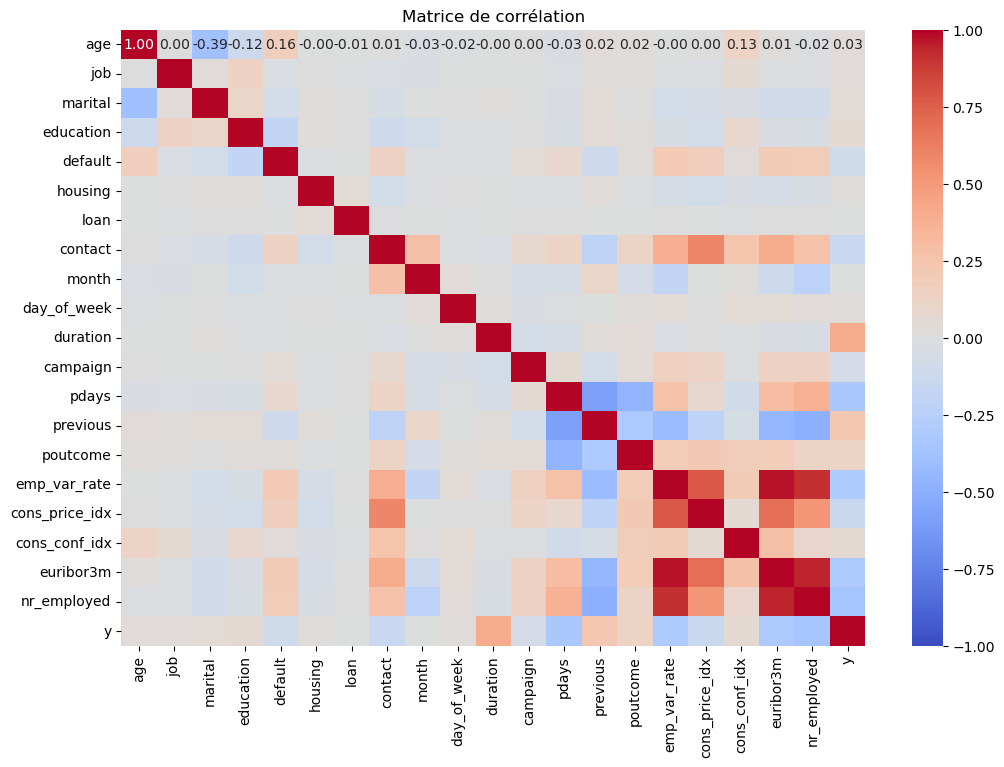

In [32]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()

In [33]:
# Table de contingence pour 'marital' et 'y'
marital_vs_y = df.groupby('marital')['y'].mean()
print("Proportion de bons clients par statut marital :")
print(marital_vs_y)

Proportion de bons clients par statut marital :
marital
0    0.103231
1    0.101561
2    0.140090
3    0.150000
Name: y, dtype: float64


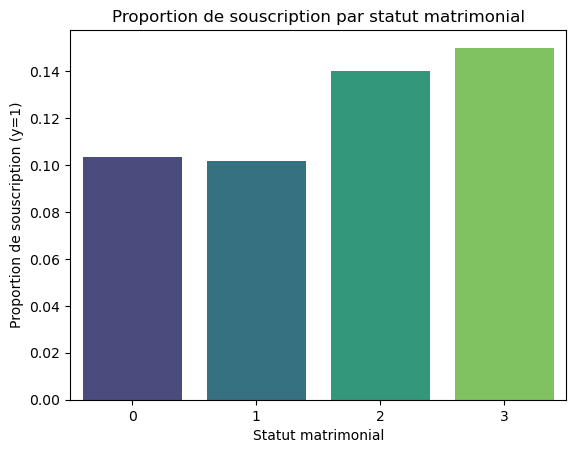

In [34]:
# Graphique correspondant
sns.barplot(x=marital_vs_y.index, y=marital_vs_y.values, palette="viridis")
plt.title('Proportion de souscription par statut matrimonial')
plt.xlabel('Statut matrimonial')
plt.ylabel('Proportion de souscription (y=1)')
plt.show()

In [35]:
# Calcul des corrélations
correlations = df.corrwith(df['y'])

In [36]:
# Trier par importance
print("Corrélations des variables numériques avec la cible (y) :")
print(correlations.sort_values(ascending=False))

Corrélations des variables numériques avec la cible (y) :
y                 1.000000
duration          0.405297
previous          0.230202
poutcome          0.129810
education         0.057776
cons_conf_idx     0.054802
marital           0.046249
age               0.030381
job               0.025248
day_of_week       0.015970
housing           0.011613
loan             -0.004922
month            -0.006051
campaign         -0.066361
default          -0.099364
cons_price_idx   -0.136134
contact          -0.144774
emp_var_rate     -0.298289
euribor3m        -0.307740
pdays            -0.324948
nr_employed      -0.354669
dtype: float64


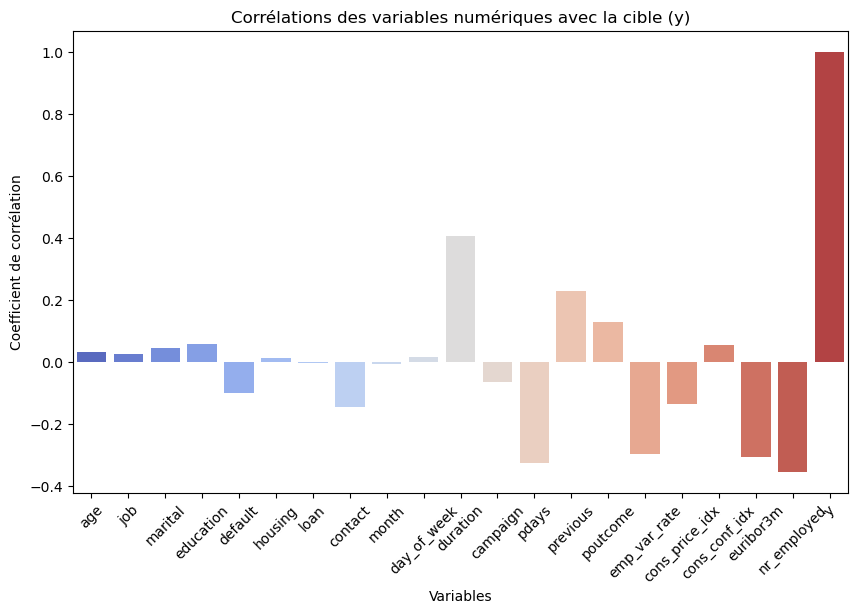

In [37]:
# Visualisation des corrélations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
plt.title("Corrélations des variables numériques avec la cible (y)")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.show()

# Interprétez les résultats et donner les premières tendances de prédiction 

Ca se trouve dans le document word

# Faites la modélisation (Instanciation – Entrainement – Evaluation – Prédiction)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Séparer les features et la cible
X = df.drop(columns=['y'])
y = df['y']


In [40]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Ensemble d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Ensemble de test : {X_test.shape}, {y_test.shape}")

Ensemble d'entraînement : (28823, 20), (28823,)
Ensemble de test : (12353, 20), (12353,)


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Instanciation du modèle de régression logistique
log_reg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

In [43]:
# Entraînement du modèle
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [44]:
# Prédictions
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]  

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("Rapport de classification :")
print(classification_rep)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10961
           1       0.43      0.87      0.58      1392

    accuracy                           0.86     12353
   macro avg       0.71      0.86      0.74     12353
weighted avg       0.92      0.86      0.87     12353



[[9357 1604]
 [ 181 1211]]


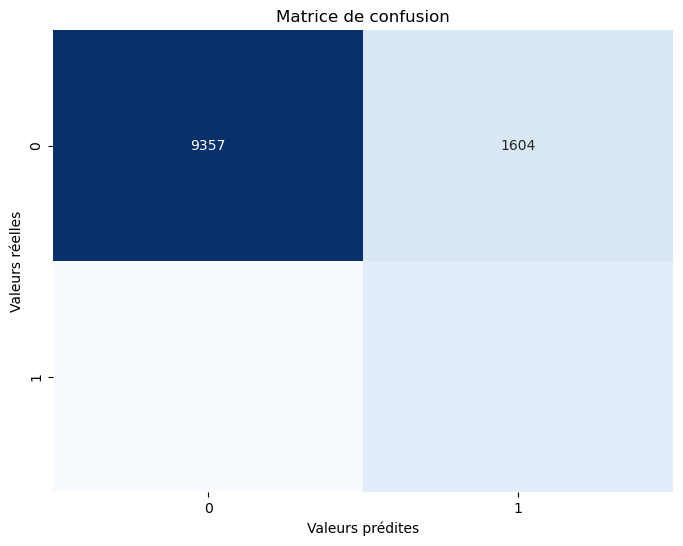

In [47]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matrice de confusion")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [49]:
# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

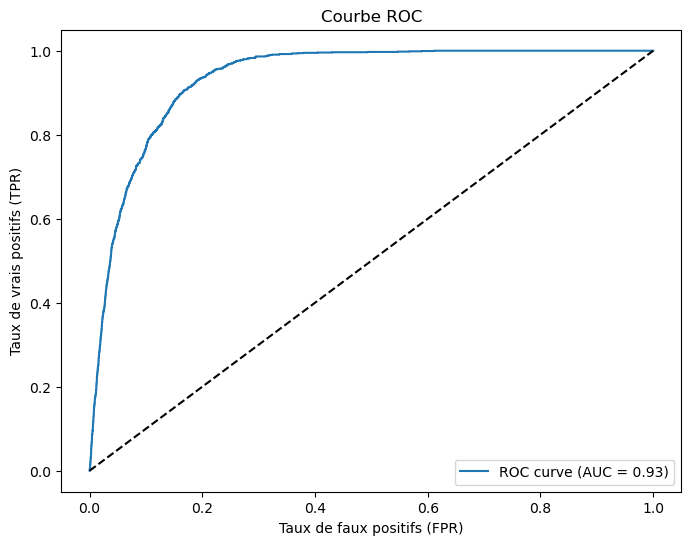

In [50]:
# Visualisation de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Instancier le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

In [53]:
# Entraîner le modèle
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)

In [55]:
# Évaluation
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Rapport de classification (Random Forest) :")
print(classification_rep_rf)
print("\nMatrice de confusion (Random Forest) :")
print(conf_matrix_rf)

Rapport de classification (Random Forest) :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10961
           1       0.66      0.46      0.54      1392

    accuracy                           0.91     12353
   macro avg       0.80      0.71      0.75     12353
weighted avg       0.90      0.91      0.91     12353


Matrice de confusion (Random Forest) :
[[10628   333]
 [  753   639]]


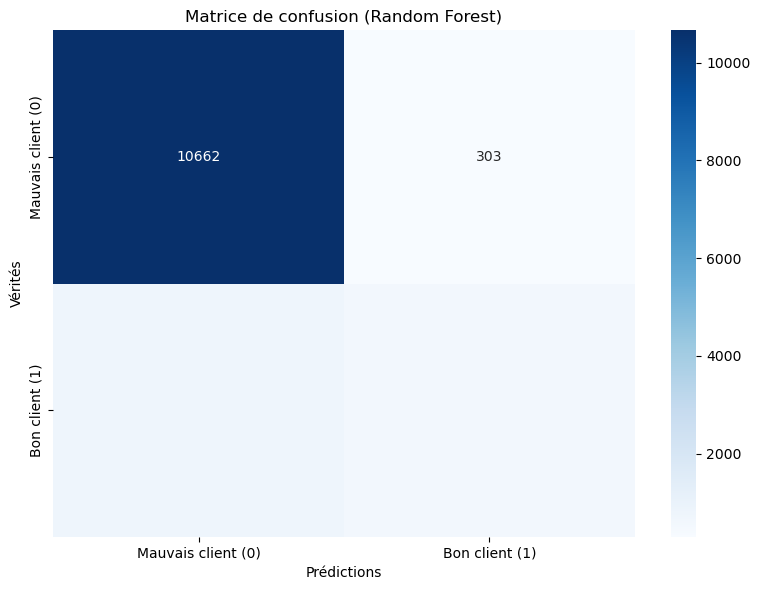

In [56]:
conf_matrix_rf = [[10662, 303], [767, 625]] 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Mauvais client (0)", "Bon client (1)"], 
            yticklabels=["Mauvais client (0)", "Bon client (1)"])

plt.title("Matrice de confusion (Random Forest)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.tight_layout()  # Ajuster l'espacement pour éviter les coupures
plt.show()

In [57]:
# Importance des variables
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
features = X.columns if hasattr(X, 'columns') else [f"Var{i}" for i in range(X.shape[1])]


In [58]:
# Tri des variables et importances
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

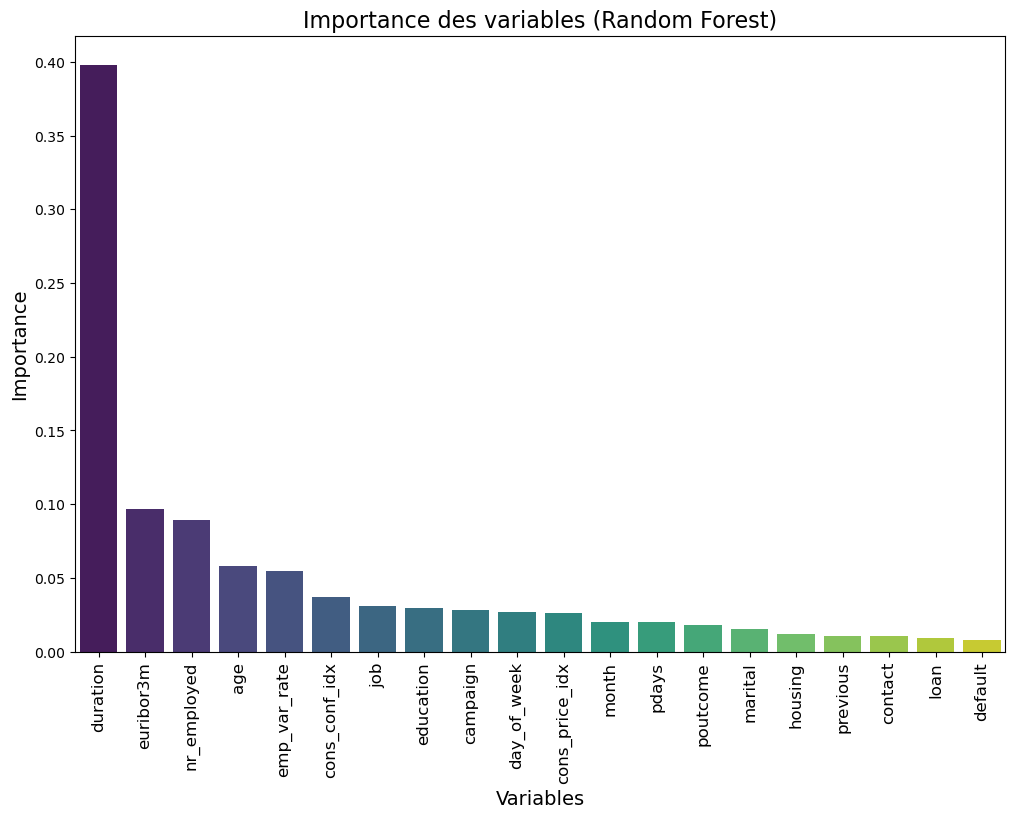

In [59]:
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features, y=sorted_importances, palette="viridis")
plt.title("Importance des variables (Random Forest)", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotation pour les noms des variables
plt.show()

## Le modèle combiné

In [60]:
# Régression logistique
log_reg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]


In [61]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [62]:
# Combinaison des prédictions des deux modèles
y_pred_proba_combined = (y_pred_proba_log_reg + y_pred_proba_rf) / 2
y_pred_combined = (y_pred_proba_combined >= 0.5).astype(int)

In [63]:
# Évaluation du modèle combiné
classification_rep_combined = classification_report(y_test, y_pred_combined)
conf_matrix_combined = confusion_matrix(y_test, y_pred_combined)

In [64]:
# Affichage du rapport de classification
print("Rapport de classification (Modèle combiné) :")
print(classification_rep_combined)

Rapport de classification (Modèle combiné) :
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10961
           1       0.56      0.76      0.64      1392

    accuracy                           0.90     12353
   macro avg       0.76      0.84      0.79     12353
weighted avg       0.92      0.90      0.91     12353



In [65]:
# Affichage de la matrice de confusion
print("\nMatrice de confusion (Modèle combiné) :")
print(conf_matrix_combined)


Matrice de confusion (Modèle combiné) :
[[10122   839]
 [  335  1057]]


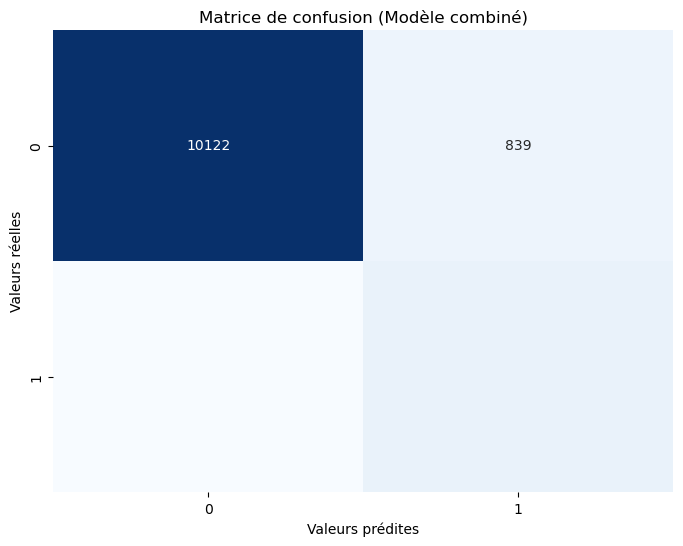

In [66]:
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matrice de confusion (Modèle combiné)")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

In [67]:
# Courbe ROC pour le modèle combiné
fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test, y_pred_proba_combined)
roc_auc_combined = roc_auc_score(y_test, y_pred_proba_combined)

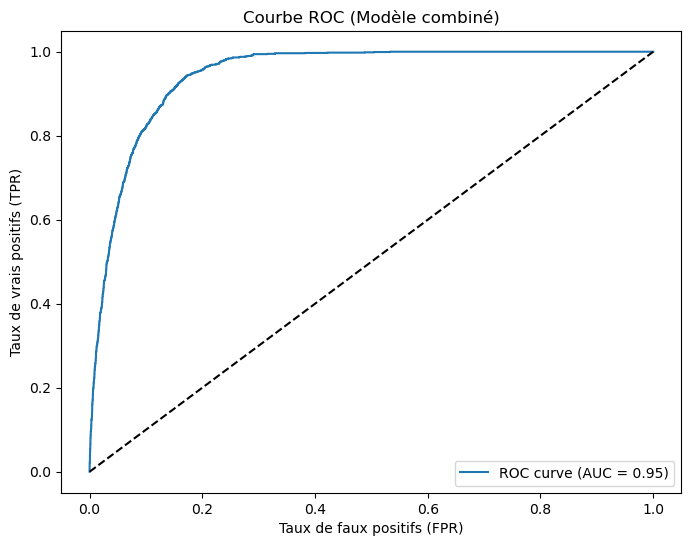

In [68]:
# Visualisation de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_combined, tpr_combined, label=f"ROC curve (AUC = {roc_auc_combined:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC (Modèle combiné)")
plt.legend(loc="lower right")
plt.show()

# Recommandations

Dans le document word

# Prediction de client fonction et interface

In [69]:
import joblib

In [70]:
# Enregistrer le modèle entraîné 
joblib.dump(rf_model, 'random_forest_model.joblib')
print("Modèle enregistré avec succès dans 'random_forest_model.joblib'.")


Modèle enregistré avec succès dans 'random_forest_model.joblib'.


In [71]:
# Charger le modèle enregistré
loaded_model = joblib.load('random_forest_model.joblib')

In [72]:
# Exemple de prédiction pour un client donné

new_client = [[40, 2, 1, 1, 0, 1, 0, 0.5, -1.5, 1.2, 3.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
prediction = loaded_model.predict(new_client)
print("Prédiction pour le nouveau client : ", "Bon client" if prediction[0] == 1 else "Mauvais client")

Prédiction pour le nouveau client :  Mauvais client


C:\Users\kotic\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
def predict_client(client_data, model):
    prediction = model.predict([client_data])
    return "Bon client" if prediction[0] == 1 else "Mauvais client"

In [74]:
# Exemple : modèle pré-entraîné et données d'un client
new_client = [40, 2, 1, 1, 0, 1, 0, 0.5, -1.5, 1.2, 3.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [75]:
# Prédiction
result = predict_client(new_client, loaded_model)
print("Prédiction pour le nouveau client : ", result)

Prédiction pour le nouveau client :  Mauvais client


C:\Users\kotic\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
def predict_client(data):
    # Convertir les données en tableau numpy
    data = np.array(data).reshape(1, -1)
    prediction = loaded_model.predict(data)
    return "Bon client" if prediction[0] == 1 else "Mauvais client"

In [77]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install flask-ngrok

Note: you may need to restart the kernel to use updated packages.


In [79]:
from flask import Flask, request, jsonify, render_template_string
import joblib
import numpy as np

# Charger le modèle entraîné
model = joblib.load('random_forest_model.joblib')

# Initialiser l'application Flask
app = Flask(__name__)

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import joblib

app = Flask(__name__)

# Charger le modèle
model = joblib.load('random_forest_model.joblib')

@app.route('/')
def home():
    return """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prédiction Client</title>
    
</head>
<body>
<style>
body {
    font-family: Arial, sans-serif;
   
    color: #ffffff;
    margin: 0;
    padding: 0;
    display: flex;
    justify-content: center;
    align-items: center;
    height: 100vh;
}

.container {
    display: flex;
    flex-direction: row;
    width: 90%;
    max-width: 1200px;
    background-color: #ffffff;
    color: #0D355E;
    border-radius: 10px;
    overflow: hidden;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
}

.welcome-section {
    width: 30%;
    background-color: #0D355E;
    color: #ffffff;
    padding: 20px;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
    text-align: center;
}

.welcome-section h1 {
    font-size: 28px;
    margin-bottom: 10px;
}

.welcome-section p {
    font-size: 16px;
}

.form-section {
    width: 70%;
    padding: 20px;
     border: 5px solid #0D355E;
}

.form-row {
    display: flex;
    justify-content: space-between;
}
.C{
    display: flex;
    
}

.C1 {
    width: 48%;
    display: flex;
    flex-direction: column;
    margin-right:20px
}

label {
    margin-top: 10px;
    font-size: 8px;
}

input {
    margin-top: 5px;
    padding: 8px;
    font-size: 5px;
    border: 1px solid #ccc;
    border-radius: 4px;
}



button {
    background-color: #F15445;
    color: #ffffff;
    border: none;
    padding: 5px 10px;
    font-size: 10px;
    cursor: pointer;
    border-radius: 4px;
     /* Align button to the extreme right */
    
}

button:hover {
    background-color: #d9433d;
}
.b{
    display: flex;
    justify-content: flex-end;
    margin-right:20px;
    margin-top: 5px

}

</style>
    <div class="container">
        <!-- Welcome Section -->
        <div class="welcome-section">
            <h1>Bienvenue dans Prédiction Client</h1>
            <p>Notre interface pour la prédiction des clients.</p>
        </div>

        <!-- Form Section -->
        <div class="form-section">
            <form action="/predict" method="post">
                <div class="C">
                <div class="C1">
                    <label for="age">Âge (normalisé)</label>
                    <input type="number" step="0.01" id="age" name="age" required>

                    <label for="job">Job (encodé)</label>
                    <input type="number" id="job" name="job" required>

                    <label for="marital">Marital (encodé)</label>
                    <input type="number" id="marital" name="marital" required>

                    <label for="education">Education (encodé)</label>
                    <input type="number" id="education" name="education" required>

                    <label for="default">Default (encodé)</label>
                    <input type="number" id="default" name="default" required>

                    <label for="housing">Housing (encodé)</label>
                    <input type="number" id="housing" name="housing" required>

                    <label for="loan">Loan (encodé)</label>
                    <input type="number" id="loan" name="loan" required>

                    <label for="contact">Contact (encodé)</label>
                    <input type="number" step="0.01" id="contact" name="contact" required>

                    <label for="month">Month (encodé)</label>
                    <input type="number" step="0.01" id="month" name="month" required>

                    <label for="day_of_week">Day of Week (encodé)</label>
                    <input type="number" step="0.01" id="day_of_week" name="day_of_week" required>
                </div>

                <div class="C1">
                
                    <label for="duration">Duration</label>
                    <input type="number" step="0.01" id="duration" name="duration" required>
                
                    <label for="campaign">Campaign</label>
                    <input type="number" step="1" id="campaign" name="campaign" required>
                    <label for="pdays">Pdays</label>
                    <input type="number" step="1" id="pdays" name="pdays" required>

                    <label for="previous">Previous</label>
                    <input type="number" step="1" id="previous" name="previous" required>

                    <label for="poutcome">Poutcome (encodé)</label>
                    <input type="number" id="poutcome" name="poutcome" required>

                    <label for="emp_var_rate">Emp Var Rate</label>
                    <input type="number" step="0.01" id="emp_var_rate" name="emp_var_rate" required>

                    <label for="cons_price_idx">Cons Price Index</label>
                    <input type="number" step="0.01" id="cons_price_idx" name="cons_price_idx" required>

                    <label for="cons_conf_idx">Cons Conf Index</label>
                    <input type="number" step="0.01" id="cons_conf_idx" name="cons_conf_idx" required>

                    <label for="euribor3m">Euribor 3M</label>
                    <input type="number" step="0.01" id="euribor3m" name="euribor3m" required>

                    <label for="nr_employed">Number Employed</label>
                    <input type="number" step="0.01" id="nr_employed" name="nr_employed" required>
                </div>
            </div>
                <div class="b">
                    <button type="submit">Prédire</button>
                </div>
            </form>
        </div>
    </div>
</body>

</html> 
"""

@app.route('/predict', methods=['POST'])
def predict():
    # Récupérer les données du formulaire
    data = request.form
    input_data = pd.DataFrame({
        "age": [float(data['age'])],
        "job": [int(data['job'])],
        "marital": [int(data['marital'])],
        "education": [int(data['education'])],
        "default": [int(data['default'])],
        "housing": [int(data['housing'])],
        "loan": [int(data['loan'])],
        "contact": [float(data['contact'])],
        "month": [float(data['month'])],
        "day_of_week": [float(data['day_of_week'])],
        "duration": [float(data['duration'])],
        "campaign": [float(data['campaign'])],
        "pdays": [float(data['pdays'])],
        "previous": [float(data['previous'])],
        "poutcome": [int(data['poutcome'])],
        "emp_var_rate": [float(data['emp_var_rate'])],
        "cons_price_idx": [float(data['cons_price_idx'])],
        "cons_conf_idx": [float(data['cons_conf_idx'])],
        "euribor3m": [float(data['euribor3m'])],
        "nr_employed": [float(data['nr_employed'])],
    })

    # Faire une prédiction
    prediction = model.predict(input_data)[0]
    
    # Retourner le résultat
    result = "BON" if prediction == 1 else "MAUVAIS"
    
    return f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Résultat de la Prédiction</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha3/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #0D355E;
            color: #ffffff;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }}
        .container {{
            background-color: #ffffff;
            color: #0D355E;
            padding: 30px;
            border-radius: 10px;
            text-align: center;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
            width: 90%;
            max-width: 600px;
        }}
        .btn {{
            background-color: #F15445;
            color: #ffffff;
            border: none;
            padding: 10px 20px;
            font-size: 16px;
            border-radius: 5px;
            text-decoration: none;
        }}
        .btn:hover {{
            background-color: #d9433d;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Résultat de la Prédiction</h1>
        <p>Le client est prédictivement : <strong>{result}</strong></p>
        <a href="/" class="btn">Faire une nouvelle prédiction</a>
    </div>
</body>
</html>
"""

    
    
if __name__ == "__main__":
    app.run(port=5002, debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [13/Dec/2024 22:15:26] "GET / HTTP/1.1" 200 -
